In [129]:
### Autoren: Patrick Burger, Dominic Baron, Christian Linder, Michael Wimmer

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

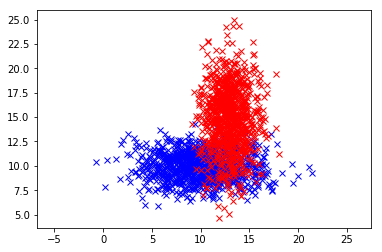

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=True, store_covariances=None, tol=0.0001)

In [115]:
#Unimodale Testdaten
x1, y1 = np.random.multivariate_normal([10, 10], [[10, 0],[0, 2]], 1000).T
plt.plot(x1, y1, 'bx')
x2, y2 = np.random.multivariate_normal([13, 15], [[2, 0],[0, 10]], 1000).T
plt.plot(x2, y2, 'rx')
plt.axis('equal')
plt.show()

# Create class map to identify training samples
amountOfTrainingSamples = 700
classes_0 = [0] * amountOfTrainingSamples
classes_1 = [1] * amountOfTrainingSamples
classes = classes_0 + classes_1

# Combine test samples as nested array
samples_0 = []
samples_1 = []
i = 0
while i < amountOfTrainingSamples:
    samples_0 += [[x1[i], y1[i]]]
    samples_1 += [[x2[i], y2[i]]]
    i += 1

samples = samples_0 + samples_1
samples = np.asarray(samples)

# train quadratic polynom classifier
QDAclassifier = QuadraticDiscriminantAnalysis(store_covariance=True)
QDAclassifier.fit(samples, classes)

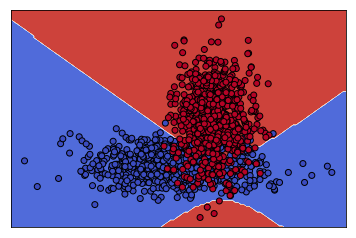

In [116]:
xx, yy = meshgrid(samples[:,0], samples[:, 1])
Z = QDAclassifier.predict(np.c_[xx.ravel(), yy.ravel()])

plot_decision_boundary(plt, xx, yy, Z)
plot_samples(plt, samples)

### Fehlerwahrscheinlichkeit mit den restlichen 30% der Daten

In [128]:
# extract last 30 percent (= 300) samples of dataSet 1
last30perc0 = extract_last300Samples(x1, y1, 1000)

# extract last 30 percent (= 300) samples of dataSet 2
last30perc1 = extract_last300Samples(x2, y2, 1000)

# Find out right decisions
rightDecisions = 0

    ## class 0
predictsClass0 = QDAclassifier.predict(last30perc0)
for pr0 in predictsClass0:
    if pr0 == 0:
        rightDecisions += 1

    ## class 1
predictsClass1 = QDAclassifier.predict(last30perc1)
for pr1 in predictsClass1:
    if pr1 == 1:
        rightDecisions += 1

# probability of error, total amount of tested samples => 300 + 300 = 600
probError = 1 - (rightDecisions / 600)

print('Die Fehlerwahrscheinlichkeit beträgt: ' + str(probError))

Die Fehlerwahrscheinlichkeit beträgt: 0.10333333333333339


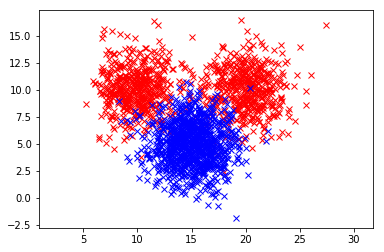

In [25]:
#Multimodale Testdaten

#Klasse 1
x3, y3 = np.random.multivariate_normal([10, 10], [[4, 0],[0, 4]], 500).T
x4, y4 = np.random.multivariate_normal([20, 10], [[4, 0],[0, 4]], 500).T
x5 = np.concatenate((x3,x4))
y5 = np.concatenate((y3,y4))

#Klasse 2
x6, y6 = np.random.multivariate_normal([15, 5], [[4, 0],[0, 4]], 1000).T

#Plot
plt.plot(x5, y5, 'rx')
plt.plot(x6, y6, 'bx')
plt.axis('equal')
plt.show()

In [26]:
#Polynom-Klassifikator

# HELPER for plot 

In [93]:
# Create a mesh to plot in
# Parameters:
#     x: data to x-axis
#     y: data to y-axis
def meshgrid(x,y):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                         np.arange(y_min, y_max, 0.2))
    
    return xx, yy

def plot_decision_boundary(sPlt, xx, yy, Z):
    Z = Z.reshape(xx.shape)
    out = sPlt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm)
    
    return out

def plot_samples(sPlt, samples):
    plt.scatter(samples[:,0], samples[:, 1], c=classes, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

# HELPER for probability of error

In [124]:
def extract_last300Samples(x, y, max):
    last300 = []
    j = max - 300

    while j < max:
        last300 += [[x[j], y[j]]]
        j += 1
        
    return last300